# Week 6: Mini-Project

(2017-08-07 22:28)

The dataset I'll use is the World Development Indicators dataset, available at [Kaggle](https://www.kaggle.com/worldbank/world-development-indicators). My research question is how the fertility rate and the female labor force participation are correlated. I am interested in how Brazil is performing over time and compared to its neighbours in South America.  
  
Based on: https://www.kaggle.com/ljvmiranda/philippines-energy-use/notebook

# 1. Organizing the data
We imported the Indicators.csv file using the Pandas's function *pandas.read_csv()*. Then, we sliced the database to retrieve only the Fertility rate, total (births per woman) and the Labor force participation rate, female (% of female population ages 15+) (national estimate) indicators. Also, we selected only the countries in South America.

In [1]:
import pandas as pd

indicators = pd.read_csv('./Indicators.csv.zip')

In [2]:
indicators.head()

,CountryName,CountryCode,IndicatorName,IndicatorCode,Year,Value
0,Arab World,ARB,"Adolescent fertility rate (births per 1,000 wo...",SP.ADO.TFRT,1960,1.335609e+02
1,Arab World,ARB,Age dependency ratio (% of working-age populat...,SP.POP.DPND,1960,8.779760e+01
2,Arab World,ARB,"Age dependency ratio, old (% of working-age po...",SP.POP.DPND.OL,1960,6.634579e+00
3,Arab World,ARB,"Age dependency ratio, young (% of working-age ...",SP.POP.DPND.YG,1960,8.102333e+01
4,Arab World,ARB,Arms exports (SIPRI trend indicator values),MS.MIL.XPRT.KD,1960,3.000000e+06


In [3]:
indicators[indicators['IndicatorName'].str.contains('Fertility')]['IndicatorName'].unique()

array(['Fertility rate, total (births per woman)'], dtype=object)

In [4]:
indicators[indicators['IndicatorName'].str.contains('Labor')]['IndicatorName'].unique()

# The indicator used is: 'Labor force participation rate, female (% of female population ages 15+) (national estimate)'

array([ 'Labor force participation rate for ages 15-24, female (%) (national estimate)',
       'Labor force participation rate for ages 15-24, male (%) (national estimate)',
       'Labor force participation rate for ages 15-24, total (%) (national estimate)',
       'Labor force participation rate, female (% of female population ages 15+) (national estimate)',
       'Labor force participation rate, male (% of male population ages 15+) (national estimate)',
       'Labor force participation rate, total (% of total population ages 15+) (national estimate)',
       'Labor force with primary education (% of total)',
       'Labor force with primary education, female (% of female labor force)',
       'Labor force with primary education, male (% of male labor force)',
       'Labor force with secondary education (% of total)',
       'Labor force with secondary education, female (% of female labor force)',
       'Labor force with secondary education, male (% of male labor force)',
     

In [5]:
# slices:

fertility = ['Fertility rate, total (births per woman)', 
             'Labor force participation rate, female (% of female population ages 15+) (national estimate)']

labor = 'Labor force participation rate, female (% of female population ages 15+) (national estimate)'

countries = ['Argentina', 'Brazil', 'Paraguay', 'Uruguay', 'Venezuela, RB'] # Full-members

# countries = ['Argentina', 'Bolivia', 'Brazil', 'Chile', 
#              'Colombia', 'Ecuador', 'Paraguay', 'Peru', 
#              'Suriname', 'Uruguay', 'Venezuela, RB'] # Full-members + associate countries

# countries = ['Argentina', 'Bolivia', 'Brazil', 'Chile', 
#              'Colombia', 'Ecuador', 'Guyana', 'Paraguay', 
#              'Peru', 'Suriname', 'Uruguay', 'Venezuela, RB'] # South America

ind = indicators[indicators['IndicatorName'].isin(fertility) & indicators['CountryName'].isin(countries)]
ind.head()

,CountryName,CountryCode,IndicatorName,IndicatorCode,Year,Value
3993,Argentina,ARG,"Fertility rate, total (births per woman)",SP.DYN.TFRT.IN,1960,3.109
5662,Brazil,BRA,"Fertility rate, total (births per woman)",SP.DYN.TFRT.IN,1960,6.210
17373,Paraguay,PRY,"Fertility rate, total (births per woman)",SP.DYN.TFRT.IN,1960,6.500
22419,Uruguay,URY,"Fertility rate, total (births per woman)",SP.DYN.TFRT.IN,1960,2.880
22665,"Venezuela, RB",VEN,"Fertility rate, total (births per woman)",SP.DYN.TFRT.IN,1960,6.616


# 2. Trend over time
The charts below show the fertility and the female labor force participation rates and the comparison of the country's performance with its neighbor South America nations.

In [6]:
%matplotlib inline
import matplotlib.pyplot as plt

In [7]:
arg_fert = ind.loc[(ind['CountryCode'] == 'ARG') & (ind['IndicatorCode'] == 'SP.DYN.TFRT.IN'), ['Value', 'Year']]
bra_fert = ind.loc[(ind['CountryCode'] == 'BRA') & (ind['IndicatorCode'] == 'SP.DYN.TFRT.IN'), ['Value', 'Year']]
pry_fert = ind.loc[(ind['CountryCode'] == 'PRY') & (ind['IndicatorCode'] == 'SP.DYN.TFRT.IN'), ['Value', 'Year']]
ury_fert = ind.loc[(ind['CountryCode'] == 'URY') & (ind['IndicatorCode'] == 'SP.DYN.TFRT.IN'), ['Value', 'Year']]
ven_fert = ind.loc[(ind['CountryCode'] == 'VEN') & (ind['IndicatorCode'] == 'SP.DYN.TFRT.IN'), ['Value', 'Year']]

arg_labor = ind.loc[(ind['CountryCode'] == 'ARG') & (ind['IndicatorCode'] == 'SL.TLF.CACT.FE.NE.ZS'), ['Value', 'Year']]
bra_labor = ind.loc[(ind['CountryCode'] == 'BRA') & (ind['IndicatorCode'] == 'SL.TLF.CACT.FE.NE.ZS'), ['Value', 'Year']]
pry_labor = ind.loc[(ind['CountryCode'] == 'PRY') & (ind['IndicatorCode'] == 'SL.TLF.CACT.FE.NE.ZS'), ['Value', 'Year']]
ury_labor = ind.loc[(ind['CountryCode'] == 'URY') & (ind['IndicatorCode'] == 'SL.TLF.CACT.FE.NE.ZS'), ['Value', 'Year']]
ven_labor = ind.loc[(ind['CountryCode'] == 'VEN') & (ind['IndicatorCode'] == 'SL.TLF.CACT.FE.NE.ZS'), ['Value', 'Year']]

year = ind['Year'].unique()

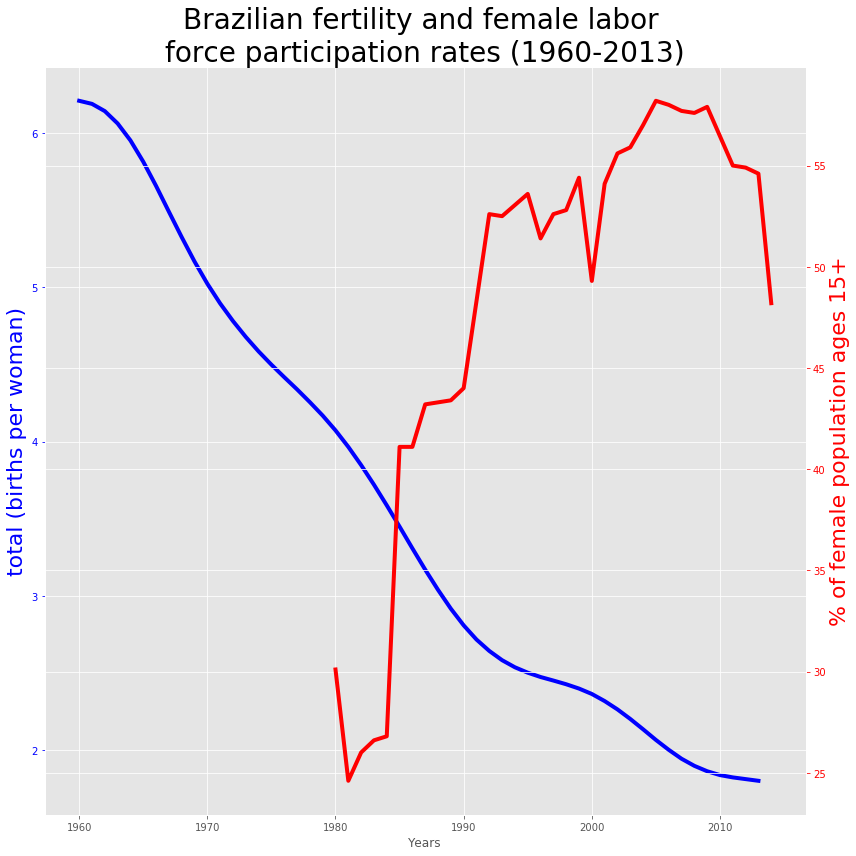

In [8]:
plt.style.use('ggplot')

fig, ax1 = plt.subplots(figsize = (12, 12))
fig.patch.set_alpha(0.0)

ax1.plot(bra_fert['Year'], bra_fert['Value'], 'b-', linewidth = 4)
ax1.set_xlabel('Years')
# Make the y-axis label, ticks and tick labels match the line color.
ax1.set_ylabel('total (births per woman)', color='b', fontsize = 22)
ax1.tick_params('y', colors='b')

ax2 = ax1.twinx()
ax2.plot(bra_labor['Year'], bra_labor['Value'], 'r-', linewidth = 4)
ax2.set_ylabel('% of female population ages 15+', color='r', fontsize = 22)
ax2.tick_params('y', colors='r')

plt.title('Brazilian fertility and female labor \nforce participation rates (1960-2013)', fontsize = 28)
fig.tight_layout()

fig.savefig('brazil_fert_labor.png', format = 'png', dpi=300)

In [9]:
#Stylistic Options
tableau20 = [(31, 119, 180), (174, 199, 232), (255, 127, 14), (255, 187, 120),    
             (44, 160, 44), (152, 223, 138), (214, 39, 40), (255, 152, 150),    
             (148, 103, 189), (197, 176, 213), (140, 86, 75), (196, 156, 148),    
             (227, 119, 194), (247, 182, 210), (127, 127, 127), (199, 199, 199),    
             (188, 189, 34), (219, 219, 141), (23, 190, 207), (158, 218, 229)]  

for i in range(len(tableau20)):    
    r, g, b = tableau20[i]    
    tableau20[i] = (r / 255., g / 255., b / 255.)

In [10]:
ind['CountryCode'].unique()

array(['ARG', 'BRA', 'PRY', 'URY', 'VEN'], dtype=object)

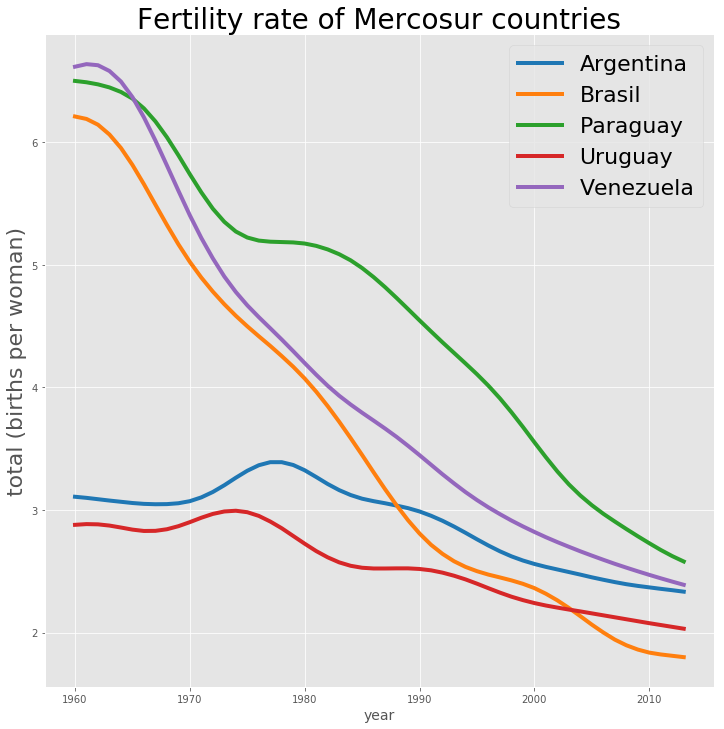

In [11]:
fig = plt.figure(figsize = (12, 12))
fig.patch.set_alpha(0.0)

plt.plot(arg_fert['Year'], arg_fert['Value'], '-', linewidth = 4, label='Argentina', color=tableau20[0])
plt.plot(bra_fert['Year'], bra_fert['Value'], '-', linewidth = 4, label='Brasil', color=tableau20[2])
plt.plot(pry_fert['Year'], pry_fert['Value'], '-', linewidth = 4, label='Paraguay', color=tableau20[4])
plt.plot(ury_fert['Year'], ury_fert['Value'], '-', linewidth = 4, label='Uruguay', color=tableau20[6])
plt.plot(ven_fert['Year'], ven_fert['Value'], '-', linewidth = 4, label='Venezuela', color=tableau20[8])

# plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.legend(fontsize = 22)
plt.xlabel('year',  fontsize = 14)
plt.ylabel('total (births per woman)',  fontsize = 22)
plt.title('Fertility rate of Mercosur countries', fontsize=28)
fig.savefig('fert.png', format = 'png', dpi=300)

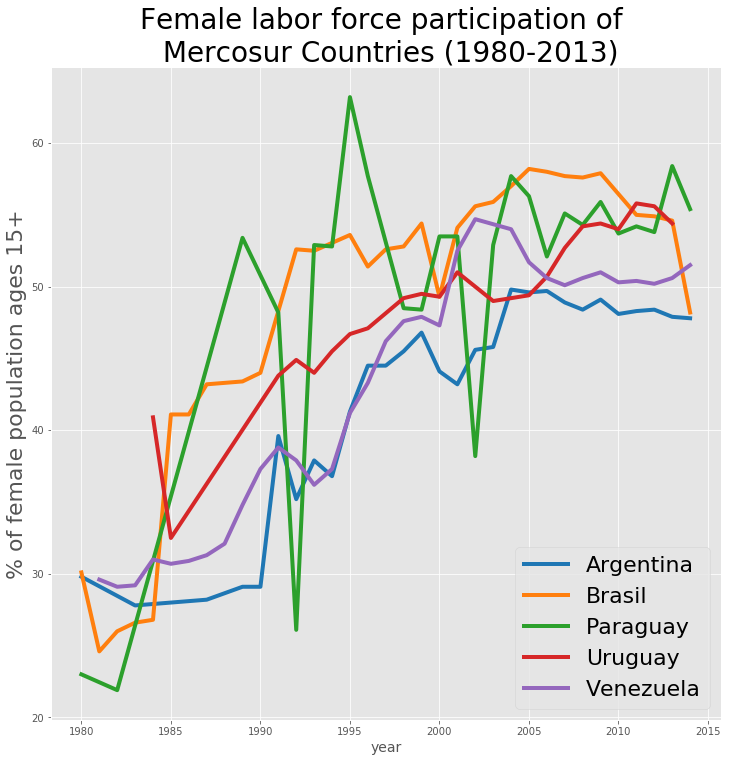

In [12]:
plt.style.use('ggplot')

fig = plt.figure(figsize = (12, 12))
fig.patch.set_alpha(0.0)

plt.plot(arg_labor['Year'], arg_labor['Value'], '-', linewidth = 4, label = 'Argentina', color = tableau20[0])
plt.plot(bra_labor['Year'], bra_labor['Value'], '-', linewidth = 4, label = 'Brasil', color = tableau20[2])
plt.plot(pry_labor['Year'], pry_labor['Value'], '-', linewidth = 4, label = 'Paraguay', color = tableau20[4])
plt.plot(ury_labor['Year'], ury_labor['Value'], '-', linewidth = 4, label = 'Uruguay', color = tableau20[6])
plt.plot(ven_labor['Year'], ven_labor['Value'], '-', linewidth = 4, label = 'Venezuela', color = tableau20[8])

# plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.legend(fontsize = 22)
plt.xlabel('year',  fontsize=14)
plt.ylabel('% of female population ages 15+',  fontsize = 22)
plt.title('Female labor force participation of \n Mercosur Countries (1980-2013)', fontsize = 28)
fig.savefig('labor.png', format = 'png', dpi=300)

In [13]:
print(len(bra_fert))
print(len(bra_labor))

54
32


In [14]:
bra = pd.merge(bra_fert, bra_labor, on = 'Year')
# bra.rename(columns = {'Value_x': 'Fertility rate', 'Value_y': 'Female labor'})

In [15]:
bra.corr()

,Value_x,Year,Value_y
Value_x,1.000000,-0.967897,-0.948653
Year,-0.967897,1.000000,0.870472
Value_y,-0.948653,0.870472,1.000000


/home/jayme/anaconda3/lib/python3.6/site-packages/statsmodels/nonparametric/kdetools.py:20: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  y = X[:m/2+1] + np.r_[0,X[m/2+1:],0]*1j


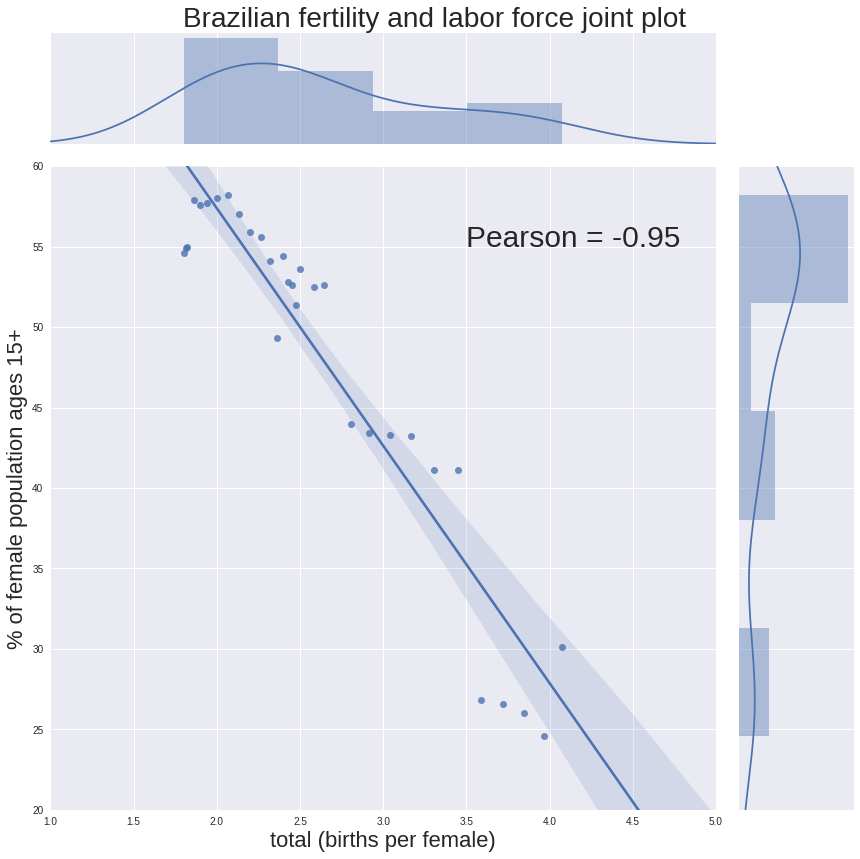

In [16]:
import seaborn as sns

joint = sns.jointplot('Value_x', 'Value_y', data = bra, kind = 'reg', size = 12, stat_func = None)
plt.subplots_adjust(top=0.95)
joint.fig.suptitle('Brazilian fertility and labor force joint plot', fontsize = 28)
plt.xlabel('total (births per female)', fontsize = 22)
plt.ylabel('% of female population ages 15+', fontsize = 22)

plt.xlim((1, 5))
plt.ylim((20, 60))

plt.annotate('Pearson = -0.95', xy = (3.5, 55), fontsize = 30)
# plt.title('Brazilian fertility and labor force joint plot', fontsize = 24)
joint.savefig('joint_plot.png', format = 'png', dpi = 300)